#Регрессионный анализ

##Часть 1 - Простая линейная регерессия

Обучение модели простой линейной регрессии

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.DataFrame({'x1': [3, 3, 6, 6, 7, 8, 9, 9, 11, 12],
                   'y': [38.1, 38.6, 40.9, 38.6, 41.3, 43.1, 44.3, 43, 45.8, 46.2]})

y = df['y'] # столбец с целевой переменной
X = df['x1'] # признак

# Разделение выборки на тренировочный и валидационный наборы с
# помощью train_test_split, X - признак, y – целевой признак,
# random_state для воспроизводимости результатов:

X_train,X_valid,y_train,y_valid = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=0)


model = LinearRegression()# инициализирование модели LinearRegression

model.fit(np.array(X_train).reshape(-1,1), y_train) # обучение модели на тренировочной выборке

LinearRegression()

Выполнение предсказания.

In [ ]:
predictions_valid = model.predict(np.array(X_valid).reshape(-1,1)) # предсказания модели на валидационной выборке

Создание датафрейма с истинными и предсказанными значениями и вывод его.

In [ ]:
from sklearn import metrics

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }) # датафрейм для сравнения предсказанных значений и реальных
df_match

,Actual,Predicted
2,40.9,40.647009
8,45.8,45.253846
4,41.3,41.568376


Подсчет и вывод метрик качества регрессии.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_valid))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_valid))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)))

print('R2 metric:', metrics.r2_score(y_valid, predictions_valid))

Mean Absolute Error: 0.3558404558404528
Mean Squared Error: 0.1447714710107837
Root Mean Squared Error: 0.3804884637026249
R2 metric: 0.9706676443246949


MAE: Средняя абсолютная ошибка. Данная метрика сведетельствует о качестве предсказанной модели. Чем меньше ее значение, тем лучше модель.
MSE: Среднеквадратичная ошибка. Чем меньше значение, тем лучше модель.
RMSE: Корень из среднеквадратичной ошибки. Чем меньше значение, тем лучше модель.
R2: Коэффициент детерминации. Чем больше значение, тем лучше модель.
По данным ошибок можно сказать, что качество модели хорошее. Она ошибается всего в 0,38 случаях. 97% прогнозов соответствуют истинным значениям.

Вывод значений коэффициентов a и b.

In [ ]:
# получение коэффициента регрессии
a = model.coef_
b = model. intercept_
print("a=", a, "b=", b)

a= [0.92136752] b= 35.118803418803424


Выполнение визуализации регрессии: точки и линия регрессии.

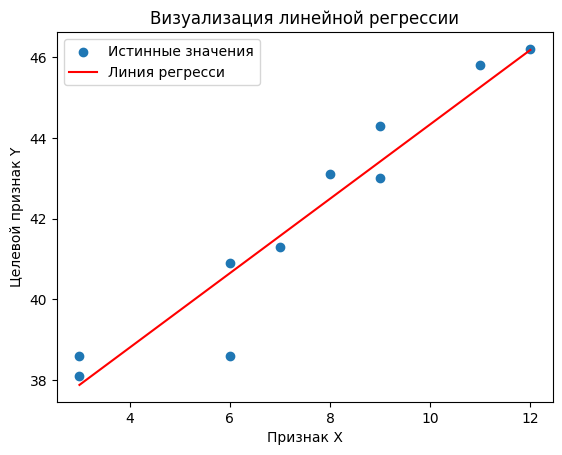

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Истинные значения") # зависимость целевого столбца от конкретного столбца х1 (точечный график)
plt.title('Визуализация линейной регрессии')
plt.xlabel('Признак X')
plt.ylabel('Целевой признак Y')

# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot([3, 12], [a*3 + b, a*12 + b], "r", label="Линия регресси")
plt.legend()

Исходя из визуализации данных на графике можно сказать, что значения распределены нелинейно, мало значениий лежит на самой линии прямой. Модель линейной регрессии не подходит под моделирование этих данных.

Построение графика с разницей предсказанного и истинного значения по каждой точке.

Text(0, 0.5, 'Предсказанные значения')

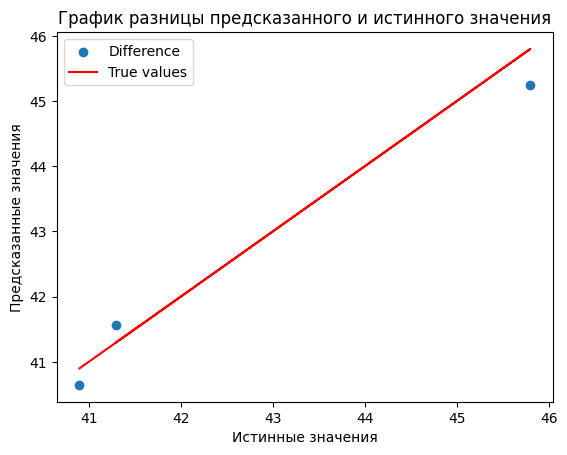

In [ ]:
df_match = df_match.reset_index() # изменение индексов для использования индексного столбца(х)

plt.scatter(df_match['Actual'], df_match['Predicted'])

plt.plot(df_match['Actual'], df_match['Actual'], "r")

plt.legend(['Difference','True values'])

plt.title('График разницы предсказанного и истинного значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

На основе визуализированных данных, так как точки лежат за пределами линии истинных значений, можно сказать, что предсказанные значения не соответствуют истинным. Однако, они не слишком удалены от них, что говорит о том, что предсказания приближены к истинным значениям, соответственно, модель хорошо обучена.

Выводы:

Данные для построения модели распределены нелинейно, в связи с чем предсказания не лежат в области истинных значений, однако приближены к ним. Данная модель хороша, так как предсказания совпадают  нстинными значениями в 97%.

##Часть 2 - Множественная линейная регрессия

Cоздается новый датасет с одним столбцом целевой переменной и двумя признаками. Далее он разделяется на две переменные, одна из которых массив (матрица) их х1 и х2.

In [ ]:
df = pd.DataFrame({'y': [38.1, 38.6, 40.9, 38.6, 41.3, 43.1, 44.3, 43, 45.8, 46.2],
                   'x1': [3, 3, 6, 6, 7, 8, 9, 9, 11, 12],
                   'x2': [9, 8, 9, 7, 4, 5, 3, 5, 1, 0]})

y = df['y'] # столбец с целевой переменной
X = df.drop(['y'], axis=1) # матрица объект-признак Х (все столбцы набора данных, кроме целевого)

Для работы с алгоритмами необходимо стандартизировать данные. Также проводится разделение выборки на тренировочный и валидационный наборы 25% на 75%. Производится обучение модели на основе тренировочной выборки.

In [ ]:
# стандартизация данных перед работой с алгоритмами:
sc = StandardScaler()
X_c = sc.fit_transform(X)

# Разделение выборки на тренировочный и валидационный наборы с помощью train_test_split,
# X- признаки, y – целевой признак, ran-dom_state для воспроизводимости результатов:
X_train,X_valid,y_train,y_valid = train_test_split(X_c,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=0)

model = LinearRegression()# инициализирование модели LinearRegression
model.fit(X_train, y_train) # обучение модели на тренировочной выборке

LinearRegression()

Выполняется предсказание.

In [ ]:
predictions_valid = model.predict(X_c) # предсказания модели по всем признакам

Создание датафрейма с истинными и предсказанными значениями и вывод его.

In [ ]:
df_match = pd.DataFrame({'Actual': y, 'Predicted': predictions_valid }) # датафрейм для сравнения предсказанных значений и реальных
df_match

,Actual,Predicted
0,38.1,37.858029
1,38.6,38.470788
2,40.9,38.992037
3,38.6,40.217554
4,41.3,42.433832
5,43.1,42.199076
6,44.3,43.802596
7,43.0,42.577079
8,45.8,45.784118
9,46.2,46.774879


Подсчет и вывод метрик качества регрессии.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions_valid))

print('Mean Squared Error:', metrics.mean_squared_error(y, predictions_valid))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions_valid)))

print('R2 metric:', metrics.r2_score(y, predictions_valid))

Mean Absolute Error: 0.7442542894852586
Mean Squared Error: 0.918629967043635
Root Mean Squared Error: 0.9584518595337144
R2 metric: 0.8846072721622386


На основе метрик можно сказать, что модель не особо хороша, так как делает верные предсказания лишь в 88% случаев.

Так как коэффицентов a несколько, с ними создается датафрейм.

In [ ]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['Коэффициент'])
df_coef

,Коэффициент
x1,1.085072
x2,-1.847444


Также производится расчет коэфицента b.

In [ ]:
b = model.intercept_

Строится график с разницей предсказанного и истинного значения по каждой точке.

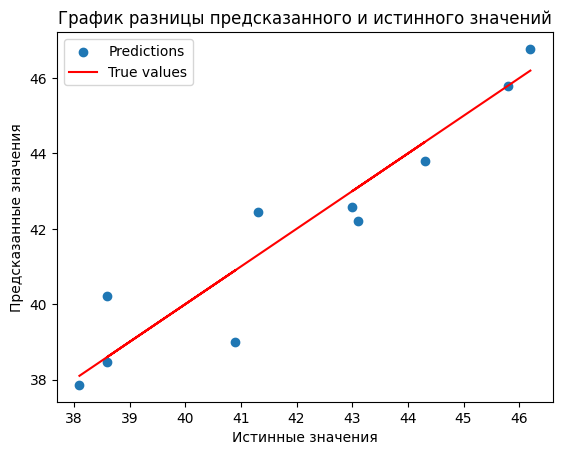

In [ ]:
df_match = df_match.reset_index() # изменение индексов для использования индексного столбца(х)

plt.scatter(df_match['Actual'], df_match['Predicted'])

# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot(df_match['Actual'], df_match['Actual'], "r")

plt.title('График разницы предсказанного и истинного значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend(['Predictions', 'True values'])

На основе графика можно сказать, что предсказания в основном находятся за пределами линии истинных значений. Они разбросаны по разные стороны от нее и находятся в приличном удалении, что говорит об отдаленности от истины.

Выводы:

Большая часть предсказаний лежит за пределами линии истинных значений и разбросаны по сторонам от нее. Также на основе анализа значений метрик качества регрессии можно судить о плохом кчестве модели. Таким образом, модель плохо предсказывает значения.

##Часть 3 - Полиномиальная регрессия

Используется PolynomialFeatures для реализации модели полиномиальной регрессии. Выбирается степень полинома - 2.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=2) #степень - 2
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

Производится обучение модели полиномиальной регрессии.

In [ ]:
# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

LinearRegression()

Выполняется предсказание.

In [ ]:
predictions = lin_reg.predict(X_poly)

Осуществлется подсчет и вывод метрик качества регрессии.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))

print('R2 metric:', metrics.r2_score(y, predictions))

Mean Absolute Error: 3.810181818181836
R2 metric: 0.9895810075919272


На основе полученных знчений можно сказать, что модель хорошо предсказывает значения на основен признаков, так как верные предсказания составляют 98% от общего их количества.

Выполняется визуализация регрессии: точки и линия регрессия.

[ 0.         10.21204545  0.64431818] 21.04272727272736


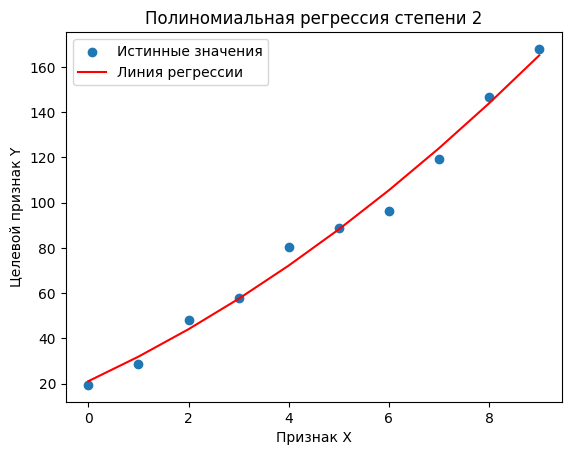

In [ ]:
plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 2')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

На основе визуализированных данных по тому что линия регрессии не затрагивает некоторые точки можно сказать, что данная степень полинома не подходит для построения модели, которая бы точно подходила под описание значений. Не смотря на высокие значения точности модели на графике видно, что не все точки предсказаний близки к истинным значениям.

Полиномиальная регрессия со степеннью 3.

Mean Absolute Error: 3.2072027972027413
R2 metric: 0.9932183196348539


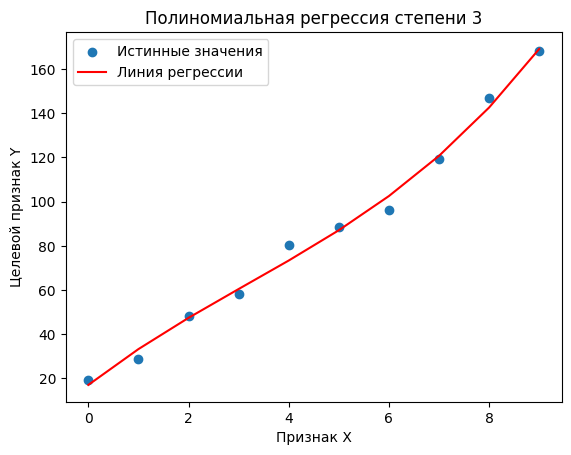

In [ ]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=3) #степень - 3
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

predictions = lin_reg.predict(X_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('R2 metric:', metrics.r2_score(y, predictions))

plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 3')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

На основе значений ошибок можно сказать, что модель степени полинома 3 с высокой точностью определяет прогнозы данных, соответствуя истинным в 99% случаев. На графике при сравнении истинных значений с линией регрессии можно заметить, что линия степени полинома 3 в отличии от 2 стала более изогнутой, так что некоторые точки стали лежать на ней.

Полиномиальная регресия со степенью 5.

Mean Absolute Error: 2.0783496503518992
R2 metric: 0.9965738819661001
[ 0.         -4.029      16.89775641 -5.28899184  0.66259324 -0.02837179] 19.77328671327676


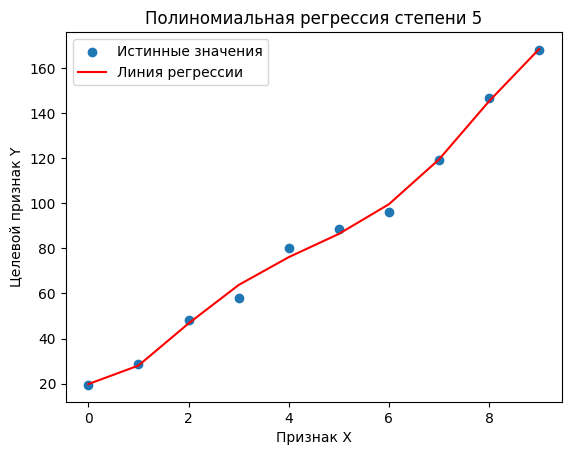

In [ ]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=5) #степень - 5
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

predictions = lin_reg.predict(X_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('R2 metric:', metrics.r2_score(y, predictions))

plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 5')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

Значения ошибок стали еще ниже, чем при предыдущих степенях полинома. Так как линия стала еще более изогнутой, смогла собрать на себе еще больше истинных значений.

Полиномиальная регресия со степенью 9.

Mean Absolute Error: 2.0754320576799047e-06
R2 metric: 0.9999999999999941
[ 0.00000000e+00 -2.12459317e+02  5.34652462e+02 -4.95127483e+02
  2.38909093e+02 -6.67019631e+01  1.11784418e+01 -1.11011786e+00
  6.02604435e-02 -1.37869334e-03] 19.400002956535317


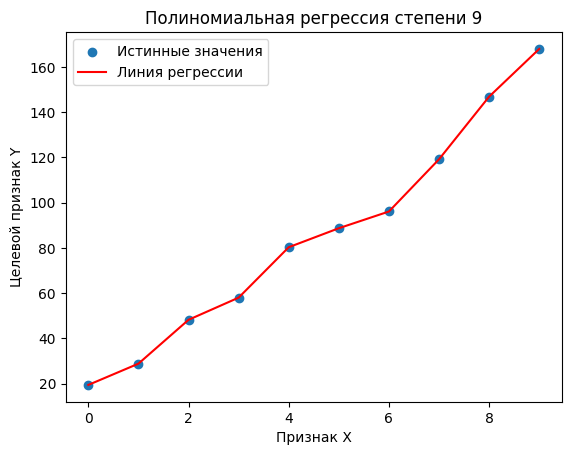

In [ ]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=9) #степень - 9
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

predictions = lin_reg.predict(X_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('R2 metric:', metrics.r2_score(y, predictions))

plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 9')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

Значения метрик качества в этой степени достигли еще более низких значений и высоких процентов истинности предсказаний. На графике отчетлива видно, что все точки истинных значений лежат на линии регрессии, что говорит о том, что модель слишком точно подстраивается под обучающие данные и склонна к переобучению сильнее других.

Полиномиальная регрессия со степенью 16.

Mean Absolute Error: 0.0011570264669316544
R2 metric: 0.9999999984588795
[-3.45467818e-02  2.74209344e+00  2.55668685e+00  2.23689707e+00
  1.72255641e+00  9.80524971e-01  8.94979609e-02 -6.43114784e-01
 -6.99329903e-01  1.12890412e-01  6.55533502e-01 -4.90043581e-01
  1.62260797e-01 -2.98089696e-02  3.14903540e-03 -1.79466273e-04
  4.28249658e-06] 19.433474049568176


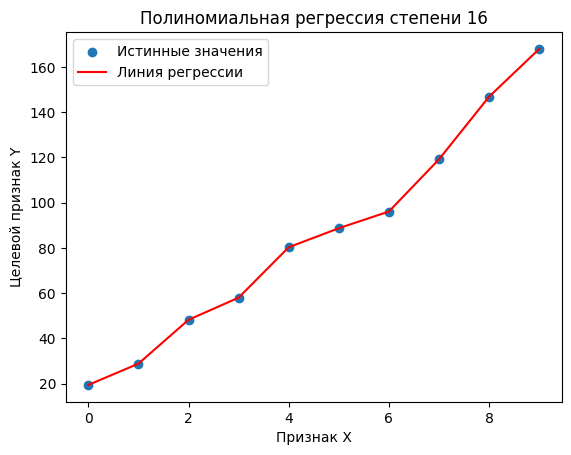

In [ ]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=16) #степень - 16
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

predictions = lin_reg.predict(X_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('R2 metric:', metrics.r2_score(y, predictions))

plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 16')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

На графике видно, что линия регрессии четко проходит по всем точкам истинных значений. Значения ошибок также достигли невиданных ранее значений точности. Однако, данная стапень увеличивает риск переобучения, что ведет к нестабильности прогрогнозов и самой модели.

Полиномиальная регрессия со степенью 17.

Mean Absolute Error: 0.8968280388262009
R2 metric: 0.9981899538926977
[ 2.07694389e-03  6.49713384e-03  1.40830059e-02  2.74195173e-02
  4.94310728e-02  8.22755985e-02  1.23276029e-01  1.57161132e-01
  1.49162672e-01  5.98063057e-02 -8.34024710e-02 -1.00236005e-01
  1.10415700e-01 -4.28962480e-02  8.69007990e-03 -9.82500137e-04
  5.88727132e-05 -1.45993839e-06] 23.766213283538818


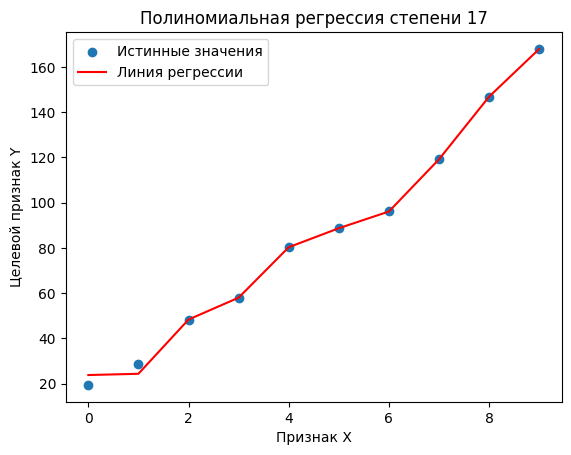

In [ ]:
df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']
poly_features = PolynomialFeatures(degree=17) #степень - 17
X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))

# после преобразование необходимо использование алгоритма линейной регрессии
lin_reg = LinearRegression() # инициализирование
lin_reg.fit(X_poly, y) # обучение

predictions = lin_reg.predict(X_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('R2 metric:', metrics.r2_score(y, predictions))

plt.scatter(X, y)

b = lin_reg.intercept_
a = lin_reg.coef_
print(a, b)
plt.plot(X, predictions, "r")

plt.title('Полиномиальная регрессия степени 17')
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')
plt.legend(['Истинные значения', 'Линия регрессии'])

На основе графике можно проследить, что из-за высокой степени полинома он сильнее изогнулся и линия регрессии больше не содержит на себе все точки истинных значений. Значения ошибок стали выше, что говорит о менее точной модели для данных значений.

Для более расширенного понимания как изменяются линии регрессии с увеличением степени полинома и какая из степеней больше подходит под предсказание данных был создан график, на котором показаны все линии регрессии для степененй полинома от 1 до 18, а также отображены точками данные истинных значений.

Text(0, 0.5, 'Целевой признак Y')

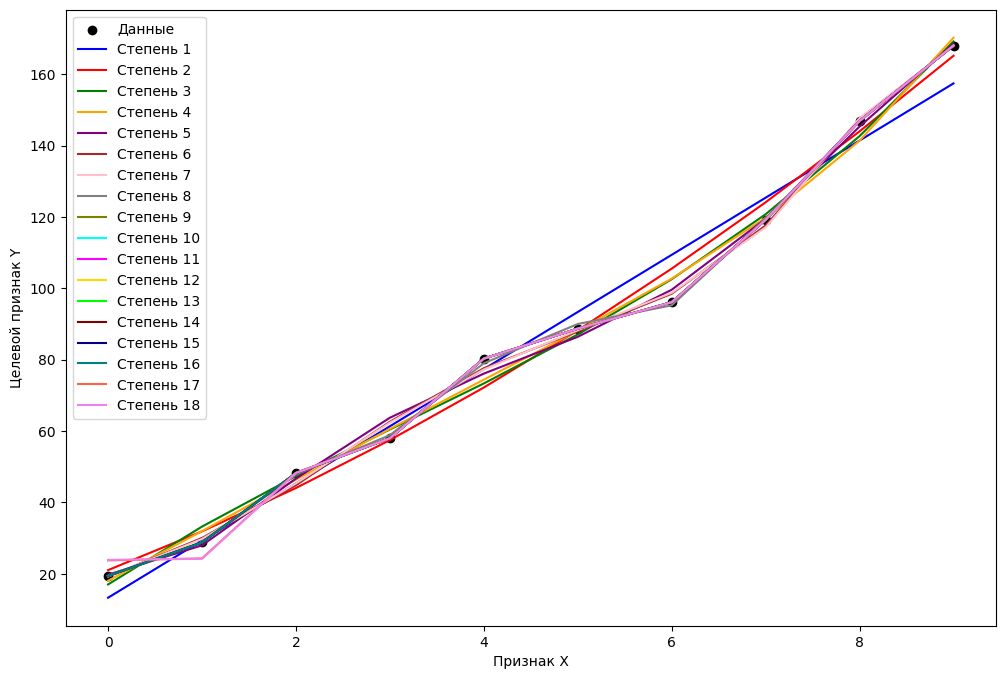

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error

df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'y': [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1, 119.2, 146.9, 168]})

X = df['x']
y = df['y']

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive',
          'cyan', 'magenta', 'gold', 'lime', 'maroon', 'navy', 'teal', 'tomato', 'violet']

plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='black', label='Данные')

for d in range(1,19):
  poly_features = PolynomialFeatures(degree=d)
  X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))
  lin_reg = LinearRegression() # инициализирование
  lin_reg.fit(X_poly, y) # обучение
  predictions = lin_reg.predict(X_poly)

  plt.plot(X, predictions, color=colors[d-1], label=f'Степень {d}')

plt.legend()
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')

Так как все линии наложились друг на друга, корректно провестианализ не представляется возможным. Для более точного анализа начальная степень полинома ограничивается (от 2 до 19).

Text(0, 0.5, 'Целевой признак Y')

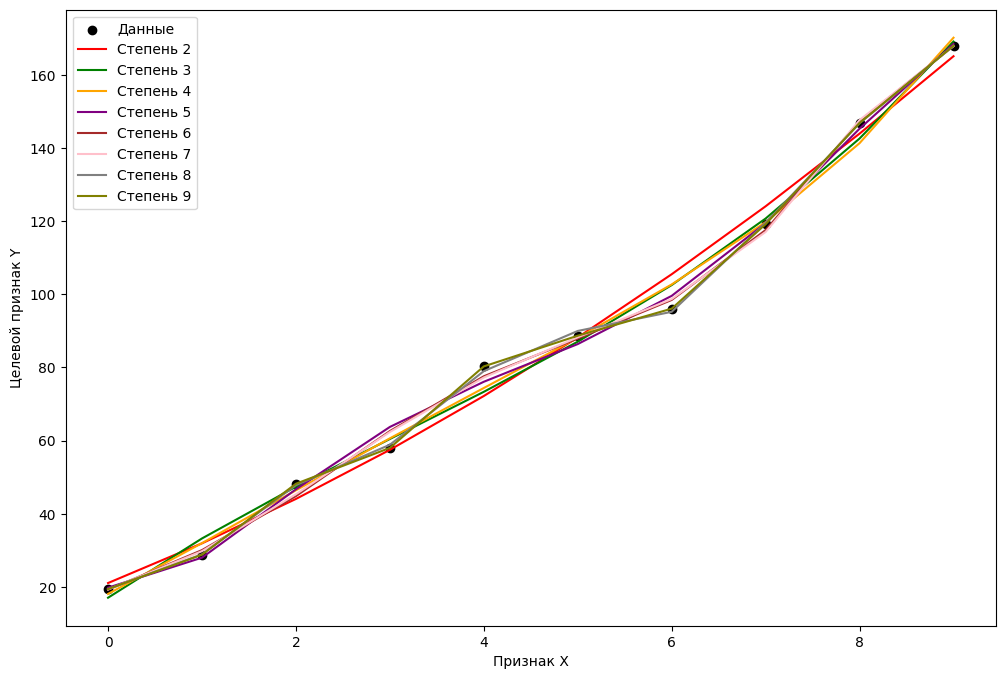

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='black', label='Данные')

for d in range(2,10):
  poly_features = PolynomialFeatures(degree=d)
  X_poly = poly_features.fit_transform(np.array(X).reshape(-1, 1))
  lin_reg = LinearRegression() # инициализирование
  lin_reg.fit(X_poly, y) # обучение
  predictions = lin_reg.predict(X_poly)

  plt.plot(X, predictions, color=colors[d-1], label=f'Степень {d}')

plt.legend()
plt.xlabel('Признак Х')
plt.ylabel('Целевой признак Y')

На грфике видно что некоторые линии наложились друг на друга и проходят по каждой точке данных. Однако видны некоторые отклонения для степеней ниже 6, что говорит о несоответствии данным.

Выводы:

Исходя из составленных графиков полиномиальной регрессии для различных степеней полинома можно выявить зависимость степени искривления линии регрессии. С увеличением степени полинома она сильнее изгибается.

Значения ошибок с каждым увеличением степени полинома растут, делая модель более точно, описывающей исходняе данные. Для данного набора истинных значений можно заметить, что степени полинома ниже 6 не идеально описывают модель данных, однако это хорошо, так как модель будет более стабильна к переобучению. Степени полинома выше идеально описывают данные, однако имеют большую склонность к переобучению по сравнению с моделями степеней ниже.
Хорошая модель должна быть достаточно точной, чтобы уловить закономерности данных, но не слишком сложной, чтобы избежать переобучения. Исходя из значений ошибок и данных графика оптимальным значением степени полинома для построения модели по заданным значениям является 5.

##Часть 4 - Решение задачи регрессии различными методами

Выполняется загрузка и обработка файла.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving car_price.csv to car_price (1).csv


In [ ]:
df = pd.read_csv('/content/car_price.csv', sep=',')

Для определения целевого столбца выводится названия всех колонок и их типов.

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Исходя из этих данных цена авто - целевая переменная, которую необходимо предсказать. Для обучения и предсказания используются данные только числовых полей.

Строится гистограмма для визуализации целевой переменной.

Text(0, 0.5, 'Количество позиций')

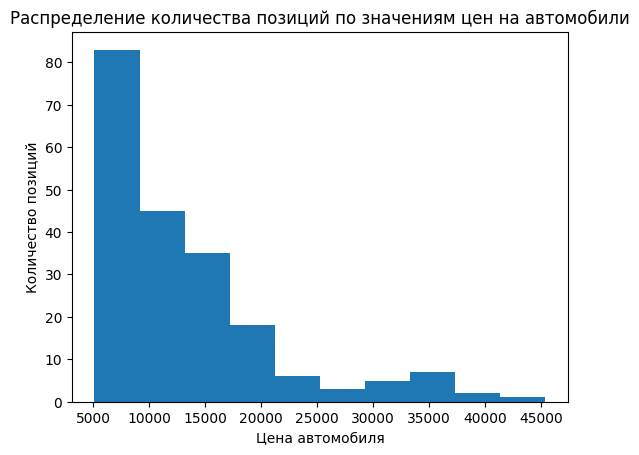

In [ ]:
plt.hist(df['price'])
plt.title('Распределение количества позиций по значениям цен на автомобили')
plt.xlabel('Цена автомобиля')
plt.ylabel('Количество позиций')

Данная гистограмма показывает распределение значений цены автомобиля. На основе данной диаграммы можно сказать, что больше всего позиций с данными об автомобилях с низкими значениями ценового диапазона.

Диаграмма boxplot.

Text(0.5, 0, 'Цена автомобиля')

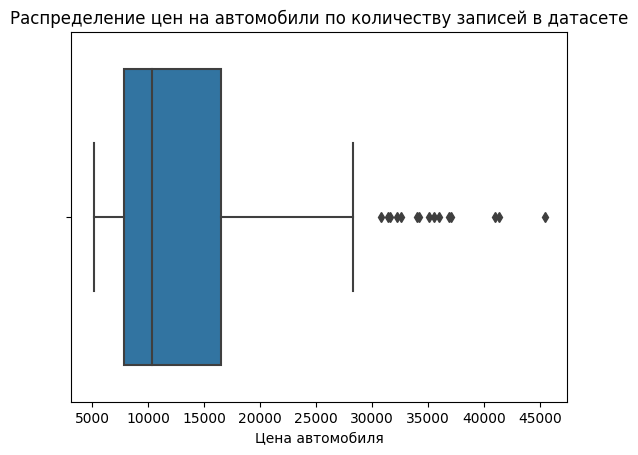

In [ ]:
import seaborn as sns

sns.boxplot(x=df["price"]).set(title='Распределение цен на автомобили по количеству записей в датасете')
plt.xlabel('Цена автомобиля')

Данная диаграмма показывает, что медианное значение цены - 10000, квартили - 7500 и 17000, максимальное значение - 28000, а минимальное - 5000. Также присутствует некоторое количество выбросов, которые на графике обозначены точками и находятся в половине большей максимальных.

Матрица диаграмм рассеивания.

array([[<Axes: xlabel='car_ID', ylabel='car_ID'>,
        <Axes: xlabel='symboling', ylabel='car_ID'>,
        <Axes: xlabel='wheelbase', ylabel='car_ID'>,
        <Axes: xlabel='carlength', ylabel='car_ID'>,
        <Axes: xlabel='carwidth', ylabel='car_ID'>,
        <Axes: xlabel='carheight', ylabel='car_ID'>,
        <Axes: xlabel='curbweight', ylabel='car_ID'>,
        <Axes: xlabel='enginesize', ylabel='car_ID'>,
        <Axes: xlabel='boreratio', ylabel='car_ID'>,
        <Axes: xlabel='stroke', ylabel='car_ID'>,
        <Axes: xlabel='compressionratio', ylabel='car_ID'>,
        <Axes: xlabel='horsepower', ylabel='car_ID'>,
        <Axes: xlabel='peakrpm', ylabel='car_ID'>,
        <Axes: xlabel='citympg', ylabel='car_ID'>,
        <Axes: xlabel='highwaympg', ylabel='car_ID'>,
        <Axes: xlabel='price', ylabel='car_ID'>],
       [<Axes: xlabel='car_ID', ylabel='symboling'>,
        <Axes: xlabel='symboling', ylabel='symboling'>,
        <Axes: xlabel='wheelbase', ylabel='sym

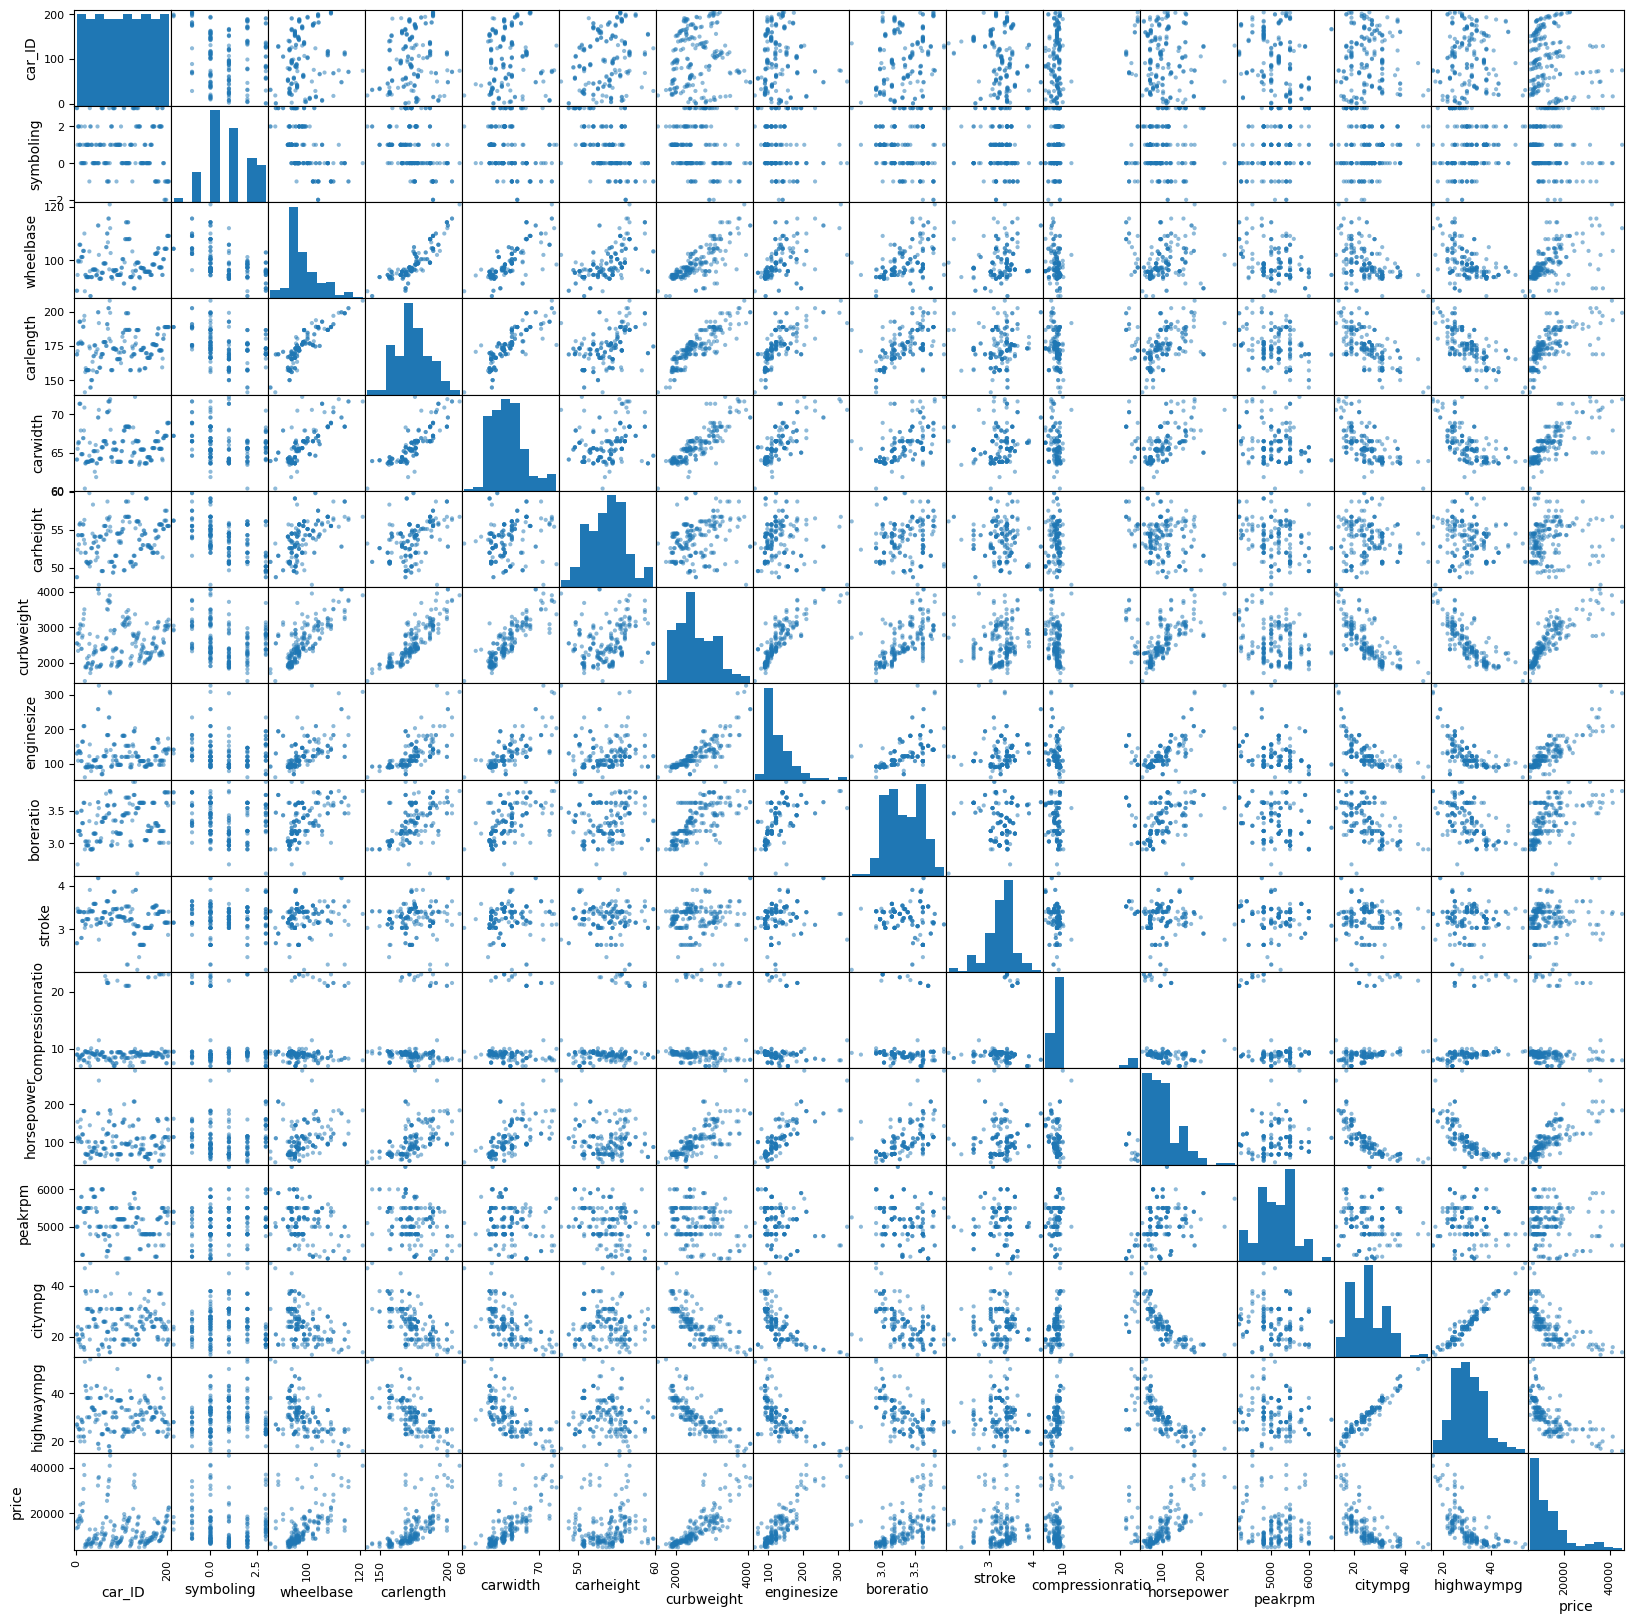

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

На основе визуализирования зависимостей переменных можно выявить некоторые характеристики этих зависимостей. Зависимость "" от "" и "" не прослеживается, так как эти поля несут в себе данные о индентификаторе автомобиля и рейтинге безопасности. Для полей "wheelbase" и "price" данные очень разбросаны, завсисимость скорее всего сложная и неоднозначная. Для полей "carlength" и "price", "carwidth" и "price", "carheight" и "price", "carweight" и "price", "energize" и "price", "boreratio" и "price" при увеличении характеристики увеличивается ее цена. Для полей "stroke" и "price" данные очень разбросаны, завсисимость скорее всего сложная и неоднозначная. Для полей "compressionratio" и "price" данные очень разбросаны, завсисимость скорее всего сложная и неоднозначная. Для полей "horsepower" и "price" зависимость прослеживается так, что при увеличении мощности увеличивается цена. Для полей "peakrpm" и "price" данные очень разбросаны, завсисимость скорее всего сложная и неоднозначная. Для полей "citympg" и "price", "highwaympg" и "price" можно заметить, что при уменьшении параметра уменьшается цена автомобиля.

Разделение данных на обучающую и валидационную выборки 20 на 80.

In [ ]:
y = df['price'] # столбец с целевой переменной
X = df.select_dtypes(include='number').drop(['price'], axis=1) # матрица объект-признак Х (все столбцы набора данных, кроме целевого)

X_train,X_valid,y_train,y_valid = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=0)

Нормализация числовых данных при помощи StahdardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создание

scaler.fit(X_train) # обучение

# преобразование
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Обучение модели линейной регрессии.

In [ ]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

Применение обученной модели на тестовой выборке и оценка её качества с помощью метрик.

In [ ]:
predictions = model.predict(X_valid_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

print('R2 metric:', metrics.r2_score(y_valid, predictions))

Mean Absolute Error: 2462.5936709343373
Mean Squared Error: 12114256.336263917
Root Mean Squared Error: 3480.55402720083
R2 metric: 0.8435181321563159


На основе значений ошибок можно сказать, что модель не особо хороша, так как дает верные прогнозы всего в 84% случаев. Количество ошибок достаточно большое. Из данных значений можно сделать вывод, что данная модель делает противоречивые высказывания.

Cоздание датафрейма с истинными и предсказанными значениями и вывод его.

In [ ]:
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions})
df_match

,Actual,Predicted
52,6795.0,6637.053334
181,15750.0,18333.059896
5,15250.0,16082.575290
18,5151.0,812.095361
188,9995.0,10404.683071
170,11199.0,12922.262119
76,5389.0,6456.101861
154,7898.0,5477.675162
104,17199.0,22688.691730
33,6529.0,8512.835494


Осуществление подбора оптимальных параметров с помощью GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

# вывод оптимальных параметров alpha и fit_intercept для модели линейной регрессии,
# которые минимизируют среденеквадратичную ошибку на кроссвалидации
print('Оптимальный параметр: ', grid_search.best_params_)
print('Оптимальный результат: ', grid_search.best_score_)

Оптимальный параметр:  {'fit_intercept': True, 'positive': False}
Оптимальный результат:  0.8066950979776593


По умолчанию установлены параметры для метода обучения линейной регрессии 'fit_intercept'=True, 'positive'=False. исходя из полученных результатов можно сказать, что модель обучена не верно и ее нужно заново переобучить.

Переобучение модели линейной регресии с новыми парамерами.

In [ ]:
model2 = LinearRegression(positive=True)

model2.fit(X_train_scaled, y_train)

LinearRegression(positive=True)

Осуществляется предсказание значений новой моделью.

In [ ]:
predictions2 = model2.predict(X_valid_scaled)

Также для новой модели следует вывести значения метрик для оценки качества.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions2))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions2))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions2)))

print('R2 metric:', metrics.r2_score(y_valid, predictions2))

Mean Absolute Error: 2893.936027128446
Mean Squared Error: 15363962.497595346
Root Mean Squared Error: 3919.689081750662
R2 metric: 0.8015411361317213


При сравнении значений метрик для двух моделей линейной регресси, но с различным значенем параметра positive, можно выявить ухудшение качества при изменении параметра со значения по умолчанию.

Исходя из сравнений двух моделей модно заметить изменение качества модели в худшую сторону. Следовательно, модель после переобучения с новыми параметрами не дает той точности, что модель с параметрами по умолчанию. Далее все характеристики и прочее будут рассматриваться для первоначально обученной модели model1.

Создание датафрейма с признаками и значением коэффициентов для каждого признака.

In [ ]:
features = pd.DataFrame(X_train_scaled).columns # список признаков

coeff = model.coef_ # список коэффициентов

df_coef = pd.DataFrame({'feature': features, 'coefficient': coeff}) # создаение датафрейма

df_coef

,feature,coefficient
0,0,-809.026163
1,1,446.239956
2,2,882.085174
3,3,-1057.271714
4,4,1324.969348
5,5,487.613629
6,6,1331.454395
7,7,3657.246410
8,8,25.520463
9,9,-1077.815581


Для определения какие номера какому параметру соответствуют в датафрейм с коэфицентами добавляется столбец с названиями. Также для удобства оценки данных данные столбца с коэфицентами были сделаны положительными и отсортированы по убыванию.

In [ ]:
df_coef['title_of_feature'] = [column for column in X]
df_coef['coefficient'] = df_coef['coefficient'].apply(abs)
df_coef.sort_values(by='coefficient', ascending=False)

,feature,coefficient,title_of_feature
7,7,3657.246410,enginesize
11,11,1836.764942,horsepower
13,13,1659.767615,citympg
14,14,1453.005225,highwaympg
6,6,1331.454395,curbweight
4,4,1324.969348,carwidth
10,10,1279.787627,compressionratio
9,9,1077.815581,stroke
3,3,1057.271714,carlength
12,12,998.899725,peakrpm


На основе значений коэффициентов можно судить о влиянии того или иного значения на предсказание. Все занчения берутся как модули, так как минус или плюс перед значением лишь определяет направление связи. Тип двигателя является самым влиятельным параметром в предсказании цены. Также имеют влияние такие факторы как количество лошадиных сил, пробег по городу и пробег по шоссе. Наименее влияющим фактором является коэффициент расточки вагона. Также не особо влияют присовенный рейтинг страхового риска, высота машины и индивидуальный идентификатор каждого наблюдения.

Выполнение визуализации. На графике отражается фактическое и предсказанное значение.

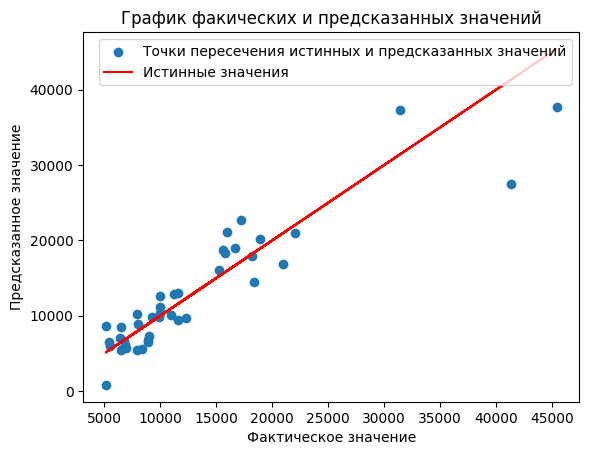

In [ ]:
plt.scatter(y_valid, predictions, label="Точки пересечения истинных и предсказанных значений") # точки пересечения истинных и предсказанных значений
plt.plot(y_valid, y_valid, 'r', label="Истинные значения") # линия истинных значений

plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.title('График факических и предсказанных значений')
plt.legend()

На основе визуализированных данных видно, что значения разбросаны в стороны от линии истинных значений, что говорит о том, что предсказания модели не сильно точные. Также заметны единичные выбросы по обе стороны линии.

Реализация регрессии методом k-ближайших соседей.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train_scaled, y_train)

predictions_k = model.predict(X_valid_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_k))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_k))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_k)))

print('R2 metric:', metrics.r2_score(y_valid, predictions_k))

Mean Absolute Error: 2410.8707317073167
Mean Squared Error: 16985632.20170732
Root Mean Squared Error: 4121.362905848903
R2 metric: 0.7805937583248539


Исходя из данных метрик можно сказать, что данная модель не имеет хорошего качества. Всего в 78% случаев она дает верные предсказания.

Визуализация фактического и предсказанного значений.

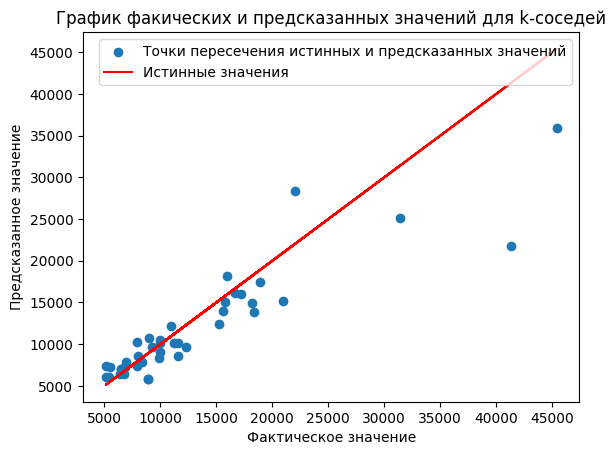

In [ ]:
plt.scatter(y_valid, predictions_k, label="Точки пересечения истинных и предсказанных значений")
plt.plot(y_valid, y_valid, 'r', label="Истинные значения") # линия истинных значений

plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.title('График факических и предсказанных значений для k-соседей')
plt.legend(loc='upper right')

По данным графика можно заметить, что есть значения приближенные к линии истинных значений, однако достаточно много выбросов по обе стороны прямой, что свидетельствует о не точности предсказаний, сделанных моделью.

Реализация регрессии деревом решений.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10) # 5 уровней в иерархии

model.fit(X_train_scaled, y_train)

predictions_tree = model.predict(X_valid_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_tree))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_tree))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_tree)))

print('R2 metric:', metrics.r2_score(y_valid, predictions_tree))

Mean Absolute Error: 2522.4076851422133
Mean Squared Error: 12168762.611913228
Root Mean Squared Error: 3488.3753542176664
R2 metric: 0.8428140655106997


По данным метрики видно, что созданная модель имеет не плохое качество. Она дает истинные предсказания в 84% случаев, что говорит о том, что достаточное количество значений приближено к истинным.

Визуализация фактического и предсказанного значений.

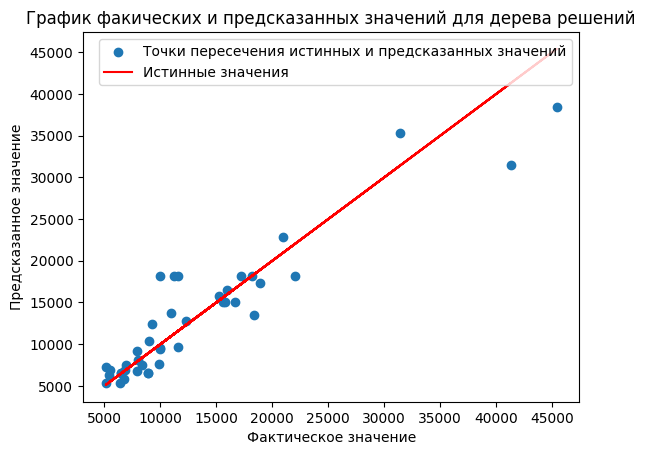

In [ ]:
plt.scatter(y_valid, predictions_tree, label="Точки пересечения истинных и предсказанных значений")
plt.plot(y_valid, y_valid, 'r', label="Истинные значения") # линия истинных значений

plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.title('График факических и предсказанных значений для дерева решений')
plt.legend(loc='upper right')

На основе визуализированных данных можно сказать, что далеко не все точки лежат на линии истинных значений. Также видно множество выбросов. которые свидетельствуют о плохом качестве модели.

Сравнительный анализ двух методов:

При сравнении двух методов k-соседей и дерева решений можно понять, что модель дерева решений гораздо лучше предсказывает данные. Это основано на том, что она имеет достаточно высокий коэффициент детерминации - 84%, что больше второго метода - 78%. Также на основе средней абсолютной ошибки можно сказать, что модель дерева решений в среднем ошибается меньше.

Анализ методов:

Cравнение моделей производится на основании метрик: средняя абсолютная ошибка (MAE), средняя квадратичная ошибка (MSE), корень из средней квадратичной ошибки (RMSE) и коэффициент детерминации (R2).

Модель линейной регрессии имеет наименьшую среднюю абсолютную ошибку (MAE) и наименьшую среднеквадратичную ошибку (MSE), что означает, что она лучше всего предсказывает значения зависимой переменной. Также она имеет наибольший коэффициент детерминации (R2), который показывает, насколько хорошо модель объясняет вариацию данных. Модель k-соседей и модель дерева решений имеют одинаковые метрики качества, которые немного хуже, чем у модели линейной регрессии. Это может означать, что модель k-соседей и модель дерева решений являются идентичными или очень похожими.

Исходя из этого сравнения, можно сделать вывод, что модель линейной регрессии является лучшей из трех моделей.

**Выводы о работе:**

В процессе выполнения работы были созданы и обучены модели линейной регрессии, множественной линейной регрессии, полиномиальной регрессии, а также применены различные методы для решения задачи регрессии на предсказание цены автомобиля на основе его технических характеристик.

Линейная регрессия и полиномиальная делают предсказания на основе одного признака, а множественная линейная регрессия способна выводить зависимость и предсказывать на основе множества признаков.

Исходя из составленных графиков полиномиальной регрессии для различных степеней полинома можно выявить зависимость искривления линии регрессии. С увеличением степени полинома она становится еще более изогнутой. Для данных была подобрана оптимальная степень полинома 5, так как она обеспечивает баланс между точностью и склонностью к переобучению.

При анализе данных файла, содержащего данные о ценах автомобилей относительно значений их параметров, было выявлено, что модель линейной регрессии наилучшим образом предсказывает значения цены автомобиля. Данное утверждение основано на сравнении метрик качества моделей, а также на основе анализа визуализированных данных модели.В составе данных, полученных для анализа и предсказания цены автомобилей по их параметрам, присутствуют как текстовые данные, так и числовые. На основе числовых данных были выявлены характеристики связей между признаками.

Модель линейной регрессии лучше всего предсказывает значения целевой переменной. Модель хорошо объясняет вариацию данных. Модель k-соседей и модель дерева решений являются идентичными или очень похожими, однако хуже чем модель линейной регрессии. При сравнении двух методов k-соседей и дерева решений было выявлено превосходства модели дерева решений.

**Дополнительное задание:**

Задание 4. Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений. Сравнить качество модели для подобранных параметров и любых других.

Подбор будет осуществляться для параметров max_depth и min_samples_leaf.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 3, 5, 7, 9], 'min_samples_leaf': [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print('Оптимальный параметр: ', grid_search.best_params_)
print('Оптимальный результат: ', grid_search.best_score_)

Оптимальный параметр:  {'max_depth': 7, 'min_samples_leaf': 2}
Оптимальный результат:  0.8949550354529567


Исходя из подобранных параметров можно сказать, что модель дерева решений, сожнанная в 4 части не оптимальна и ее необходимо переобучить.

In [ ]:
model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

model.fit(X_train_scaled, y_train)

predictions_tree = model.predict(X_valid_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_tree))

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_tree))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_tree)))

print('R2 metric:', metrics.r2_score(y_valid, predictions_tree))

Mean Absolute Error: 2156.614837398374
Mean Squared Error: 10359986.332020663
Root Mean Squared Error: 3218.6932646682353
R2 metric: 0.8661783301368047


На основе метрик качества регрессии можно выявить различия в качестве между моделями дерева решений с различными параметрами. Модель с оптимальными параметрами намного качественнее, чем с первоначально установленными. Исходная модель дает истинные предсказания лишь в 84% случаев, в то время как модель дерева решений с оптимальными параметрами - 86%. Данные пареметры истинности предсказаний далеки от иделала, но различия в качестве модели после переобучения с оптимальными параметрами заметны.